# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os, shutil
import matplotlib.pyplot as plt

from models.WGANGP_a import WGANGP
from utils.loaders_a import load_celeb
from utils.custom_utils import timer

import pickle


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeba_200k' #'celeb' ***на 1 уровень выше 
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

    
DS_path = 's:\_ML\Datasets'    

mode =  'load' #'build' #'load' #

## data

In [31]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [32]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE, DS_path)

Found 202550 images belonging to 1 classes.


In [33]:
x_train[0][0][0]

array([[[ 0.00392157, -0.01960784, -0.13725491],
        [-0.01960784, -0.01960784, -0.11372549],
        [-0.02745098, -0.01176471, -0.11372549],
        ...,
        [-0.01960784, -0.01176471, -0.12156863],
        [-0.01960784, -0.01176471, -0.12156863],
        [-0.01960784, -0.01176471, -0.12156863]],

       [[ 0.00392157, -0.01960784, -0.13725491],
        [-0.01960784, -0.01960784, -0.11372549],
        [-0.02745098, -0.01176471, -0.11372549],
        ...,
        [-0.01960784, -0.01176471, -0.12156863],
        [-0.01960784, -0.01176471, -0.12156863],
        [-0.01960784, -0.01176471, -0.12156863]],

       [[ 0.00392157, -0.01960784, -0.13725491],
        [-0.01960784, -0.01960784, -0.11372549],
        [-0.02745098, -0.01176471, -0.11372549],
        ...,
        [-0.01960784, -0.01176471, -0.12156863],
        [-0.01960784, -0.01176471, -0.12156863],
        [-0.01960784, -0.01176471, -0.12156863]],

       ...,

       [[-1.        , -1.        , -1.        ],
        [-1

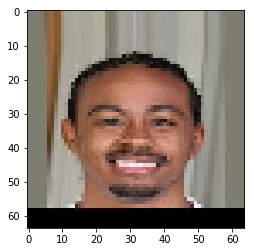

In [34]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [35]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        , plot_size = [2, 2]           
        )

In [36]:
if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    #gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights_.h5'))
    #print("wights loaded: ", os.path.join(RUN_FOLDER, 'weights/weights_'))
    
    #gan.load_weights(os.path.join(RUN_FOLDER, 'weights/gan_weights_10k.h5'))

In [37]:
gan.critic.summary()

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu_96 (LeakyReLU)   multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_97 (LeakyReLU)   multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_98 (LeakyReLU)   multiple                

In [38]:
gan.generator.summary()

Model: "functional_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_25 (Dense)             (None, 8192)              827392    
_________________________________________________________________
batch_normalization_48 (Batc (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_100 (LeakyReLU)  (None, 8192)              0         
_________________________________________________________________
reshape_12 (Reshape)         (None, 4, 4, 512)         0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 8, 8, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 256)       

## training

In [39]:
EPOCHS = 10 #6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64
save_model = False

In [40]:
gan.train = timer(gan.train)  # timer decorator start


gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
    , save_model_flag = True ##
)

W0308 23:58:04.232731 17856 training_v1.py:1982] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Must provide as many biases as the channel dimension of the input tensor: [256] vs. 512 in [64,512,8,8]
	 [[{{node functional_59/generator_conv_0/BiasAdd}}]]
	 [[loss_4/Identity_1/_1331]]
  (1) Invalid argument: Must provide as many biases as the channel dimension of the input tensor: [256] vs. 512 in [64,512,8,8]
	 [[{{node functional_59/generator_conv_0/BiasAdd}}]]
0 successful operations.
0 derived errors ignored.

Save images

In [12]:
gan.sample_images(RUN_FOLDER, 2, 2) #save images

In [13]:
import numpy as np
def sample_images_my(run_folder, r=2, c=2, id='0000'):
    """Save generated images
    (self, run_folder, r=5, c=5)
    r, c - plot matrix size
    """
    #r, c = self.plot_size[0], self.plot_size[1]
    noise = np.random.normal(0, 1, (r * c, gan.z_dim))
    gen_imgs = gan.generator.predict(noise)

    #Rescale images 0 - 1

    gen_imgs = 0.5 * (gen_imgs + 1)
    gen_imgs = np.clip(gen_imgs, 0, 1)

    fig, axs = plt.subplots(r, c, figsize=(30,30))
    cnt = 0

    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(os.path.join(run_folder, "images/custom_%s.png" % id))
    plt.close()
    


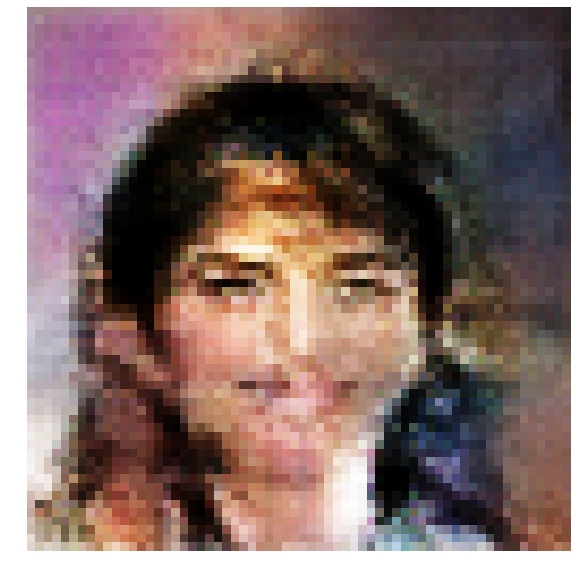

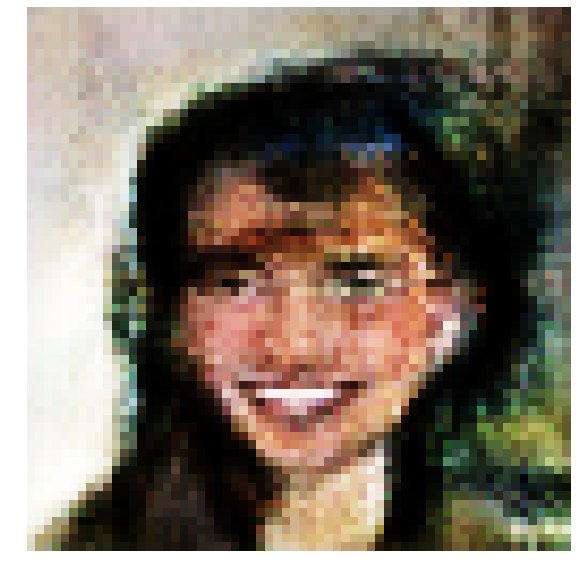

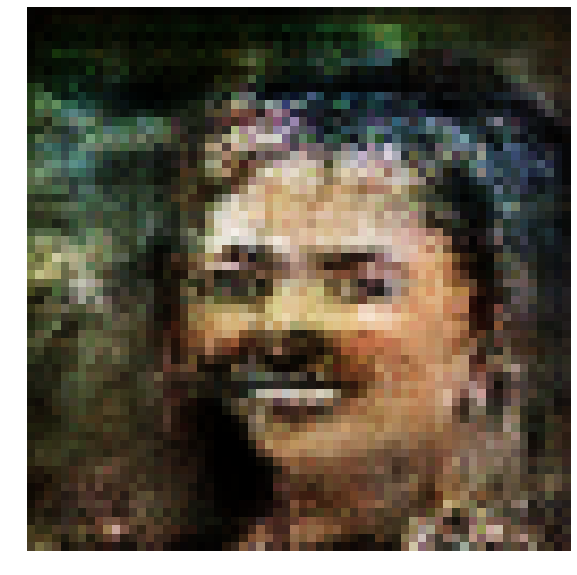

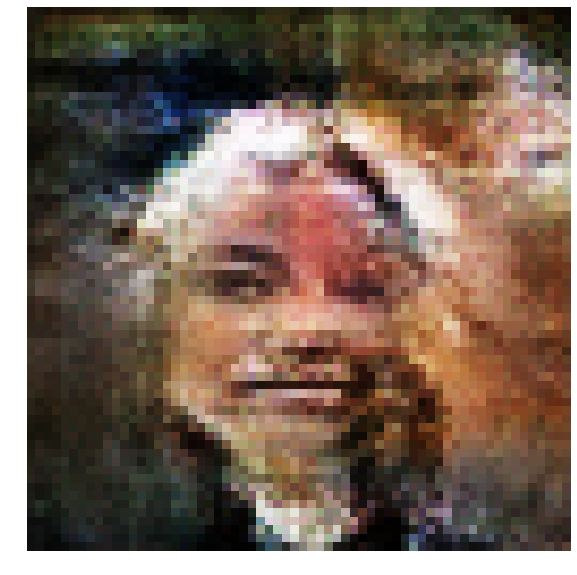

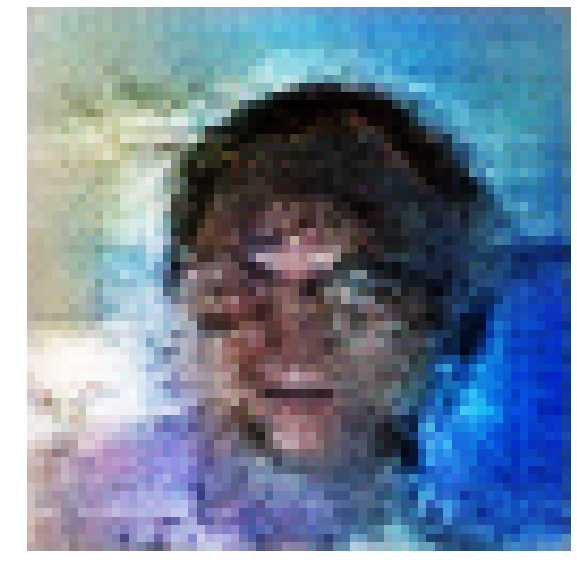

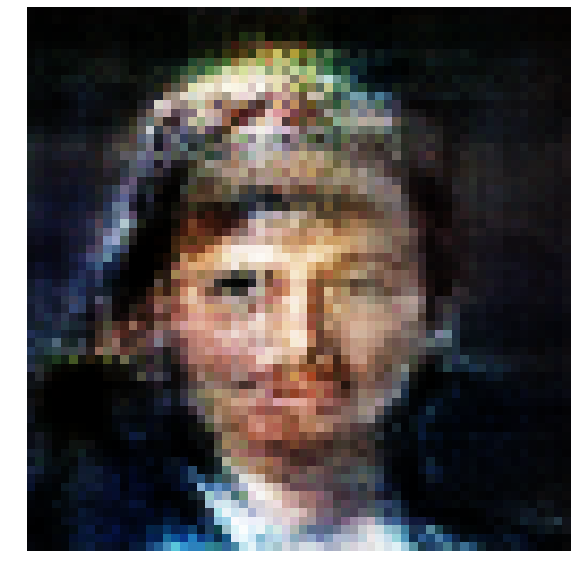

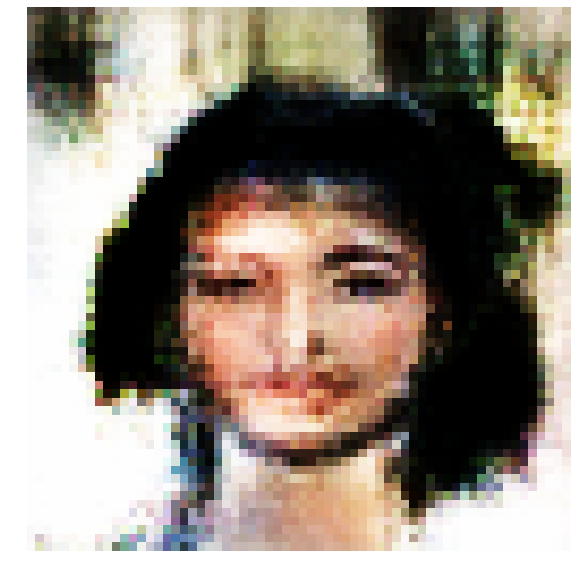

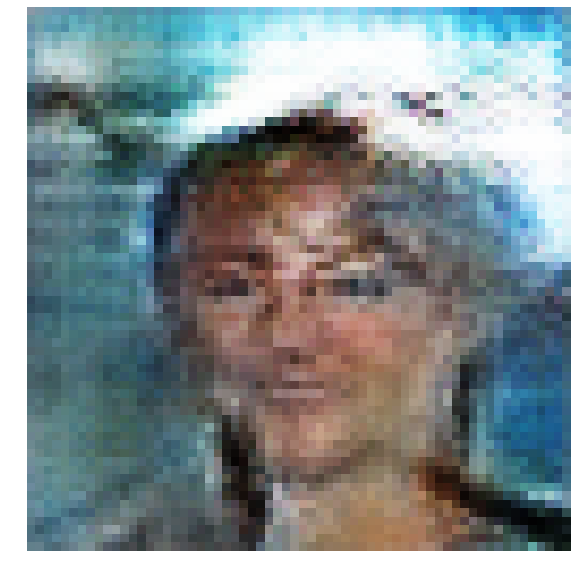

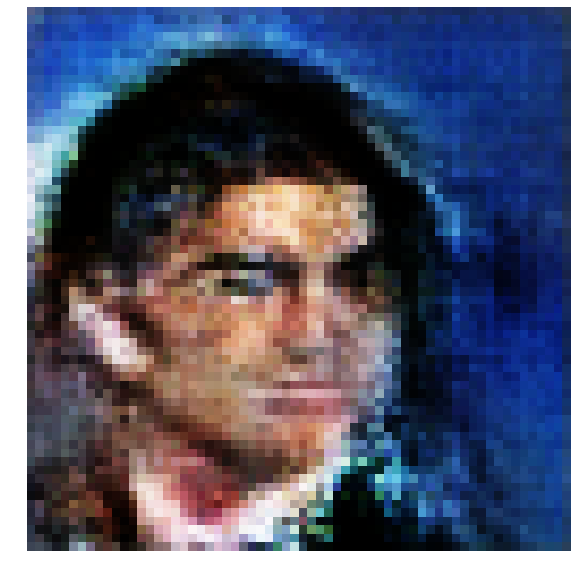

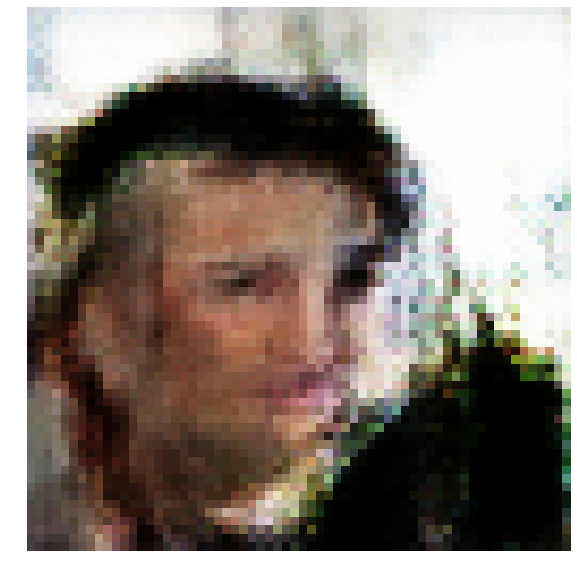

In [14]:
for id in range(10):
    noise = np.random.normal(0, 1, (1, gan.z_dim))
    
    gen_imgs = gan.generator.predict(noise)
    gen_imgs = 0.5 * (gen_imgs + 1)
    gen_imgs = np.clip(gen_imgs, 0, 1)

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(np.squeeze(gen_imgs[0, :,:,:]), cmap = 'gray_r')
    plt.savefig(os.path.join(RUN_FOLDER, "images/custom_%s.png" % id))

In [15]:
#create custom images
sample_images_my(RUN_FOLDER, 2, 2)

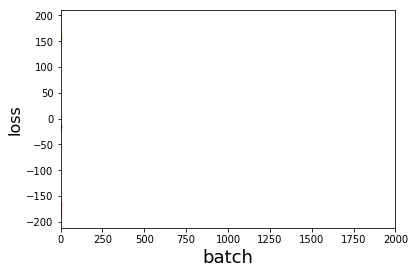

In [16]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()


In [17]:
# Copy weights
if save_model:
    shutil.copy(os.path.join(RUN_FOLDER, 'weights\\weights.h5'), os.path.join(RUN_FOLDER, 'weights\\weights_.h5'))


In [18]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

# GAN images

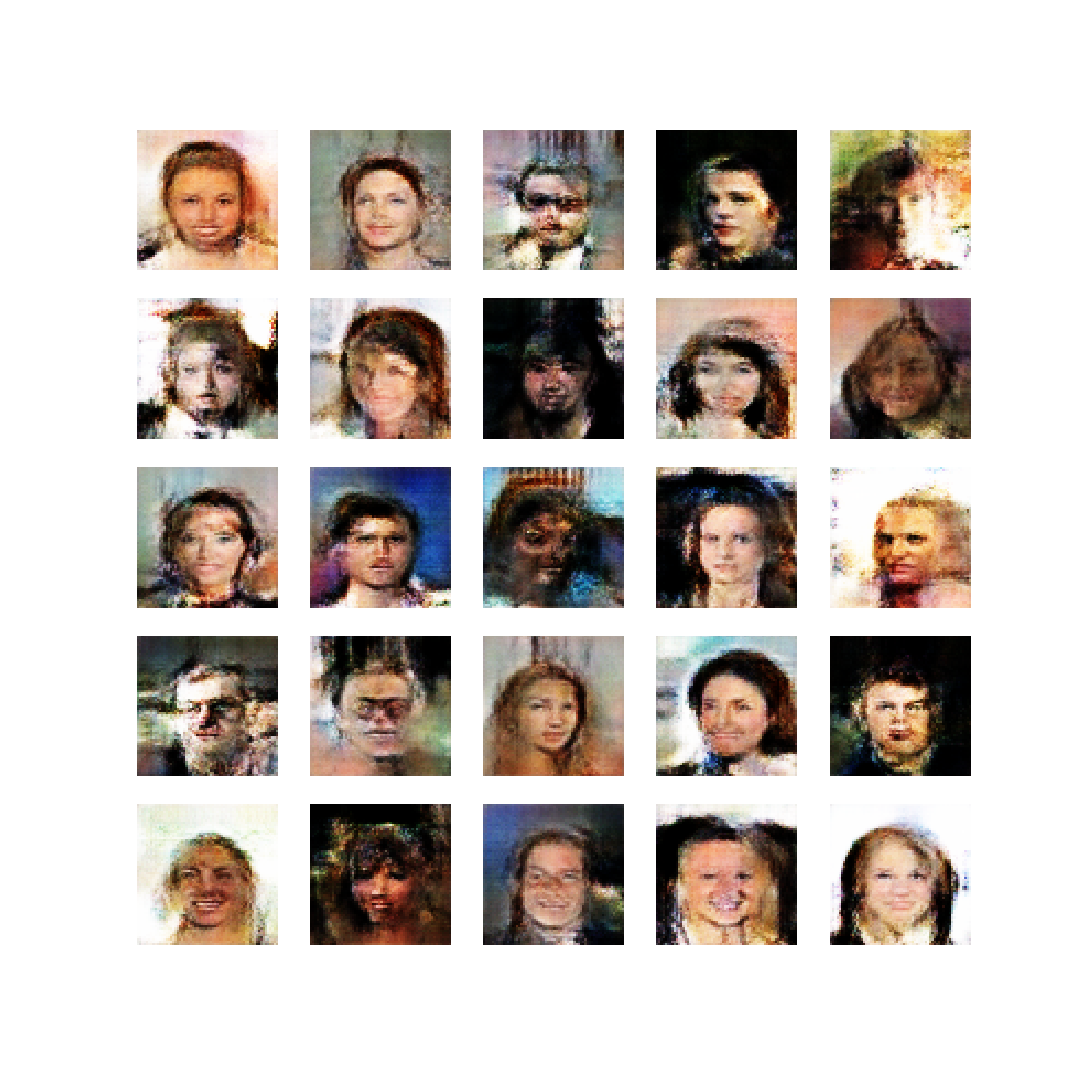

In [19]:
from IPython.display import Image
#3995
Image(filename = RUN_FOLDER + "/images/sample_3995.png", width=1080, height=1080)


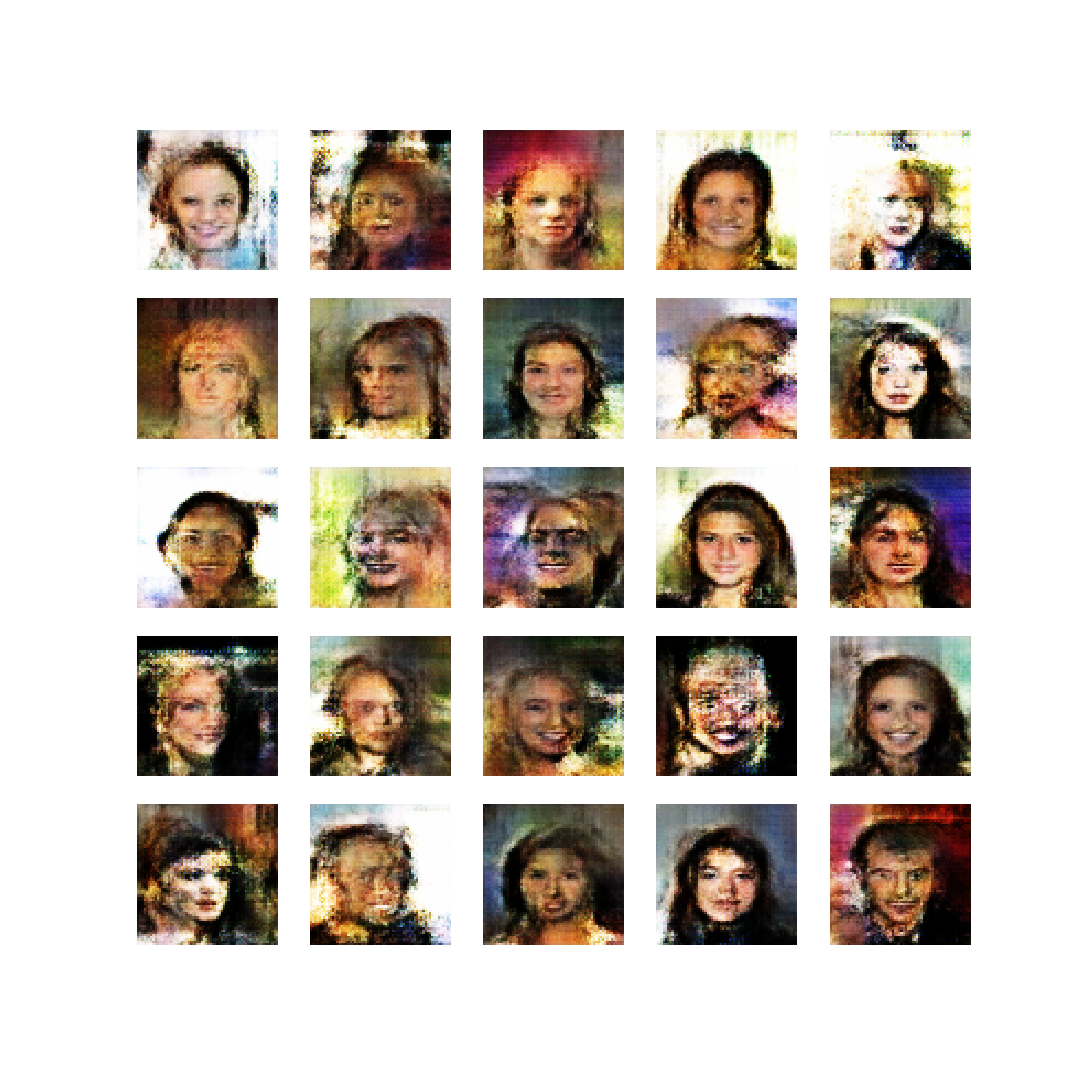

In [20]:
#3000
Image(filename = RUN_FOLDER + "/images/sample_3000.png", width=1080, height=1080)

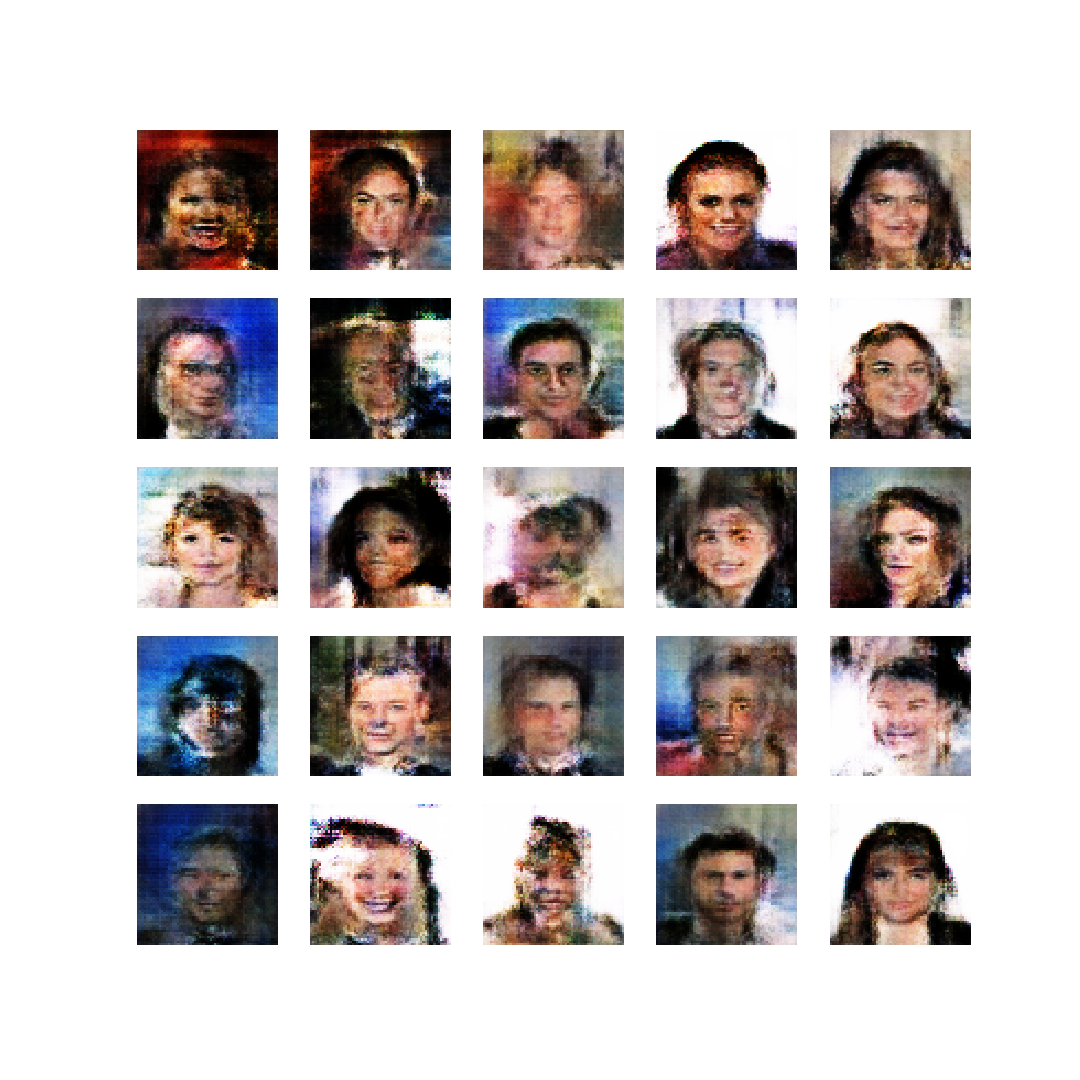

In [21]:
#2000
Image(filename = RUN_FOLDER + "/images/sample_2000.png", width=1080, height=1080)

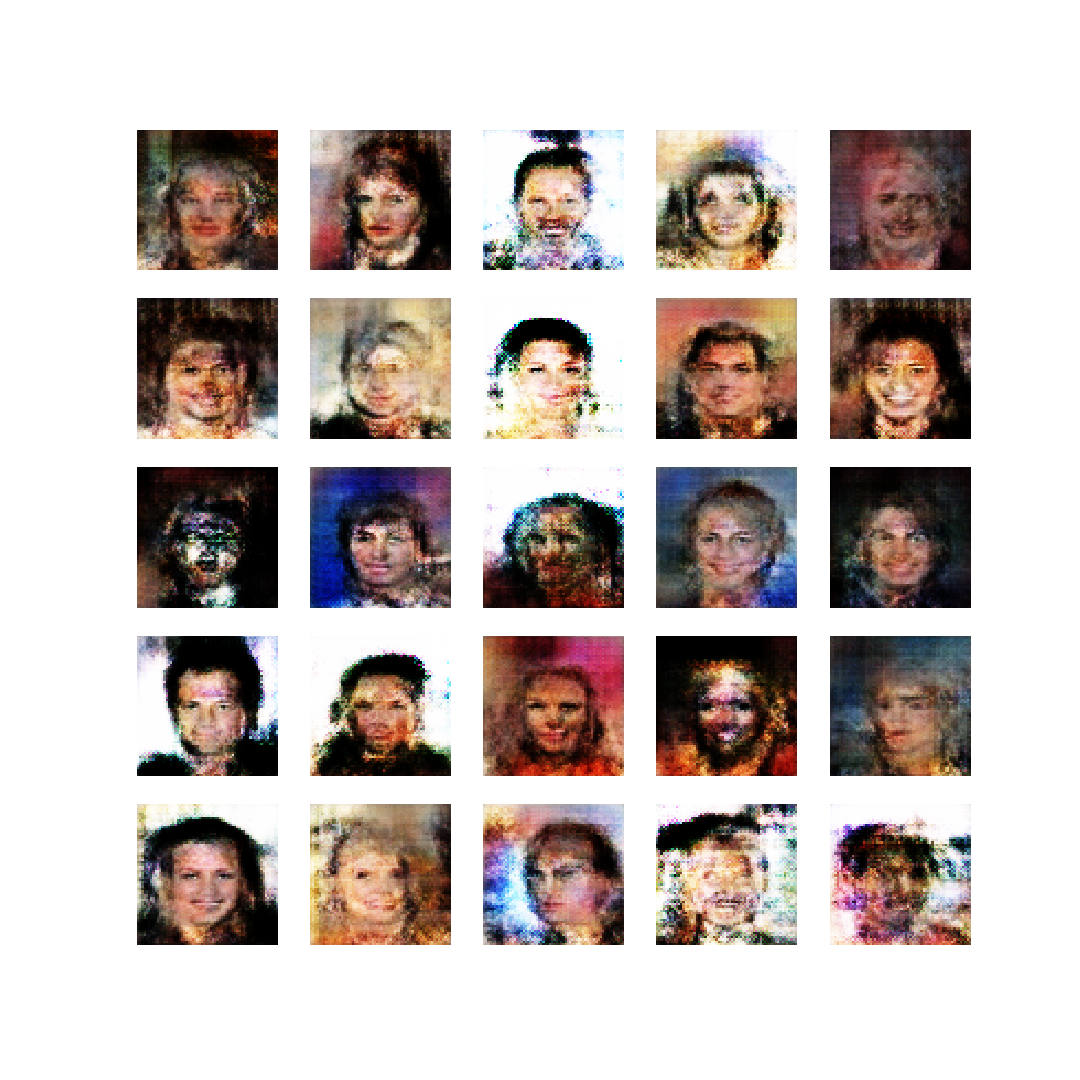

In [22]:
#1000
Image(filename = RUN_FOLDER + "/images/sample_1000.png", width=1080, height=1080)

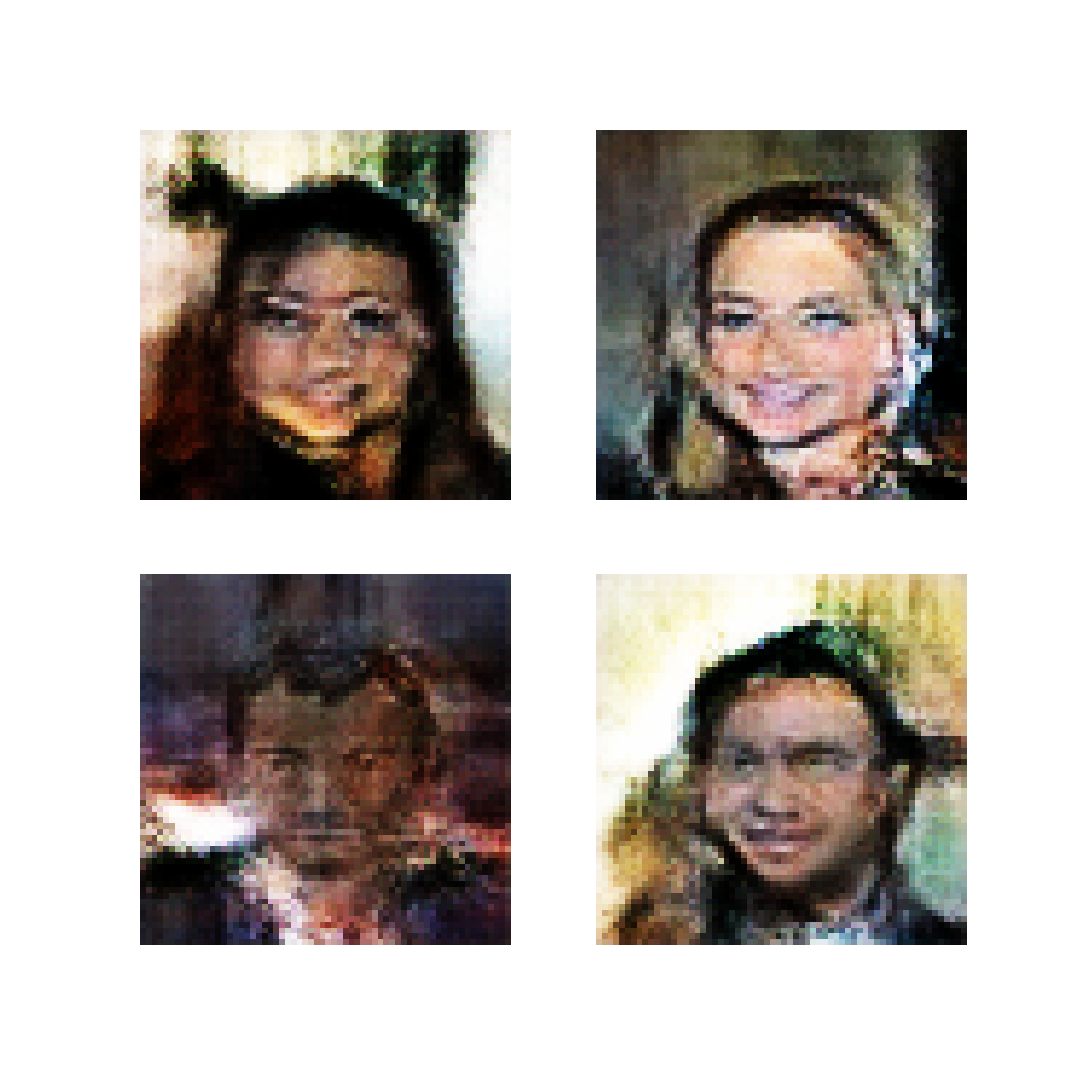

In [23]:
#0005 (после 1000)
Image(filename = RUN_FOLDER + "/images/sample_5.png", width=1080, height=1080)

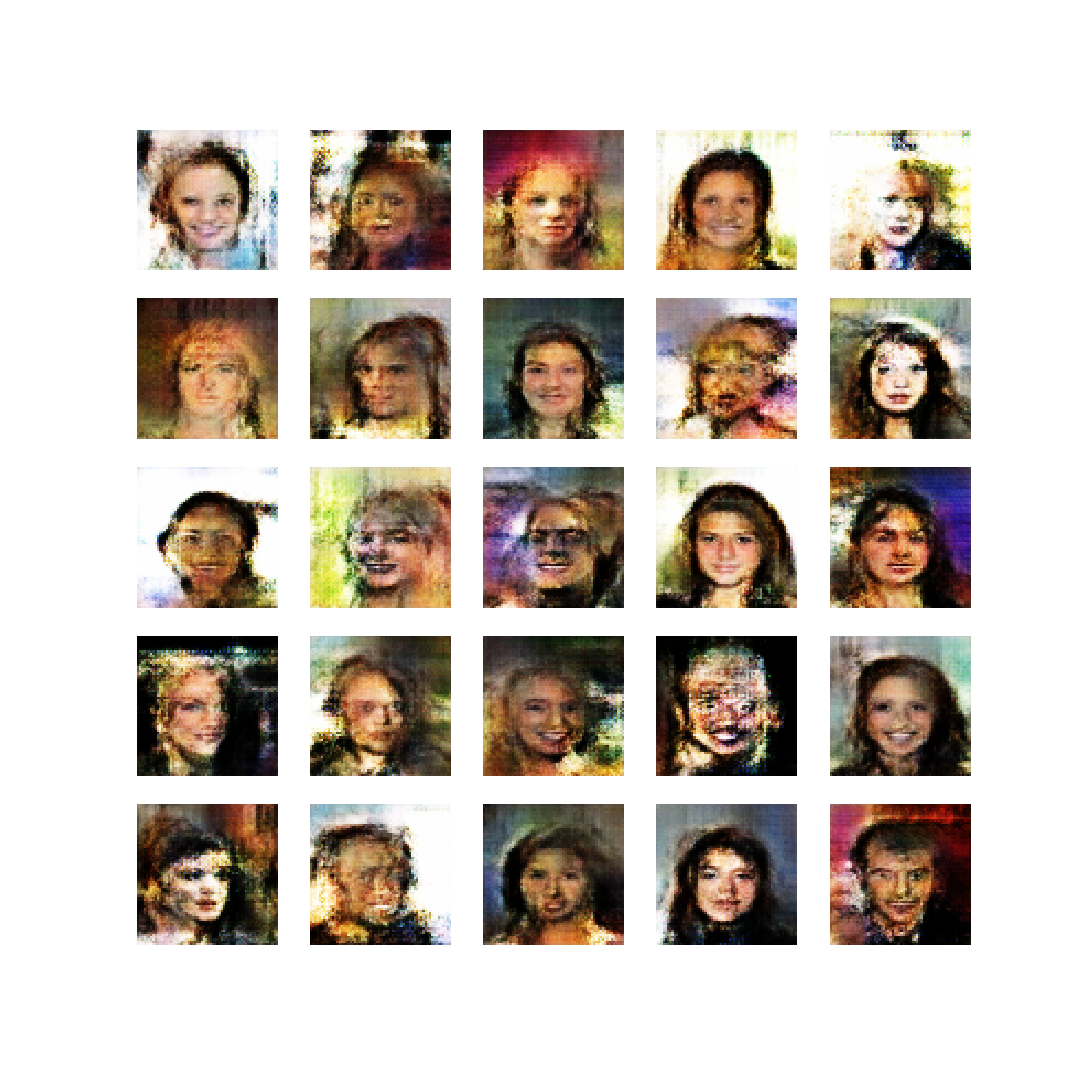

In [24]:
Image(filename = RUN_FOLDER + "/images/sample_3000.png", width=1080, height=1080)